# MiniRocket Model Notebook

This notebook shows the MiniRocket Model applied to the Global View Dataset.

### 1. Installs and Imports

In [ ]:
!pip install tsai 

In [ ]:
!pip install sktime

In [37]:
from tsai.all import *
import pandas as pd
import sklearn.metrics as skm
from scipy import signal
from tsai.basics import *
import sktime
import sklearn
my_setup(sktime, sklearn)

os             : Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.14
tsai           : 0.3.1
fastai         : 2.7.9
fastcore       : 1.5.25
sktime         : 0.13.3
sklearn        : 1.0.2
torch          : 1.11.0+cu102
device         : 1 gpu (['Tesla V100-SXM2-16GB'])
cpu cores      : 2
RAM            : 12.68 GB
GPU memory     : [15.78] GB


In [38]:
from tsai.models.MINIROCKET import *


### 2. Processing

In [39]:
global_view = pd.read_csv('Full Global View Data.csv')
global_view = global_view.drop(columns=["Unnamed: 0"])
global_view

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,0.805089,1.014019,0.879615,0.740667,1.078750,1.079406,1.205584,1.016628,0.998133,0.807200,...,1.057726,1.022003,1.160232,0.824003,0.982633,0.935857,0.936493,1.172365,1.051194,1
1,1.024147,1.022181,1.019334,1.014465,1.005740,0.994486,0.992549,1.009373,1.027504,1.036873,...,1.023391,1.028558,1.033152,1.037896,1.028911,1.015798,1.004923,1.009685,1.017351,0
2,1.177299,1.189832,1.327257,1.206747,1.099294,1.008407,0.956516,0.962503,0.983430,0.962339,...,1.106324,1.242909,1.114947,0.954955,0.958157,0.953832,0.913456,0.877882,1.117244,1
3,1.016976,0.996287,0.942826,0.993312,0.988428,1.002230,0.846147,1.037384,1.117179,1.217264,...,1.049267,0.858152,1.005960,0.875383,1.010819,0.973698,1.185194,1.011624,1.109986,1
4,0.899222,1.008320,0.955359,0.988199,0.794748,0.659896,0.742937,0.921260,0.843183,0.795844,...,1.130554,1.112823,1.151438,0.985616,1.108118,1.091524,1.215078,1.051907,0.997601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.994224,0.997571,0.993460,0.990148,0.992702,0.995424,0.994811,0.991220,0.992966,1.001081,...,0.994400,0.989497,0.987133,0.994495,0.999678,1.001759,1.001121,0.993380,0.988747,1
451,0.961073,0.984563,0.925543,0.941521,0.949315,0.990593,1.069938,1.023916,1.008956,0.957805,...,1.002177,1.025846,1.001176,0.949222,0.952527,0.962821,0.932300,0.924307,0.998634,1
452,1.062949,1.150878,1.106013,1.103070,1.073420,1.063598,1.037858,1.025627,1.001151,0.992435,...,0.954795,0.957703,0.954115,0.960708,0.954982,0.964284,0.954554,0.970666,0.946162,1
453,0.970285,0.915315,1.031886,1.051039,0.970926,1.094397,0.993410,1.037287,1.034228,1.005614,...,1.007761,0.923017,0.999288,0.967330,0.962120,1.032110,0.987394,0.925149,0.996282,0


In [40]:
# TRAIN-VALID DATA
train_valid_number = int(0.8 * global_view.shape[0])
df_train_valid = global_view.head(train_valid_number)


# TEST DATA
test_number = int(0.2 * global_view.shape[0])
df_test = global_view.tail(test_number)

In [41]:
X, y = df2xy(df_train_valid, target_col='target')
test_eq(X.shape, (df_train_valid.shape[0], 1, df_train_valid.shape[1]-1))
test_eq(y.shape, (df_train_valid.shape[0], ))

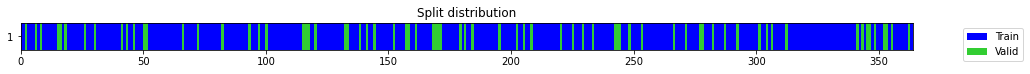

((#292) [63,188,136,323,350,134,235,62,164,36...],
 (#72) [120,72,18,6,132,225,266,243,306,202...])

In [42]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

### 3. Training

SuggestedLRs(valley=3.630780702224001e-05)

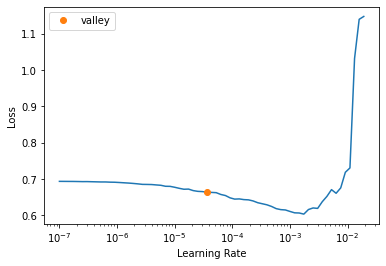

In [43]:
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
model = build_ts_model(MiniRocket, dls=dls)
learn = Learner(dls, model, metrics=accuracy, cbs=ShowGraph())
learn.lr_find()

In [44]:
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
model = build_ts_model(MiniRocket, dls=dls)
model

MiniRocket(
  (backbone): MiniRocketFeatures()
  (head): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): BatchNorm1d(9996, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Linear(in_features=9996, out_features=2, bias=True)
  )
)

epoch,train_loss,valid_loss,accuracy,time
0,0.661121,0.690759,0.416667,00:00
1,0.652842,0.683458,0.541667,00:00
2,0.642259,0.674087,0.666667,00:00
3,0.637092,0.664924,0.722222,00:00
4,0.627046,0.656978,0.708333,00:00
5,0.622171,0.649460,0.680556,00:00
6,0.617742,0.634600,0.680556,00:00
7,0.611037,0.612763,0.708333,00:00
8,0.606591,0.593973,0.694444,00:00
9,0.603180,0.583630,0.680556,00:00


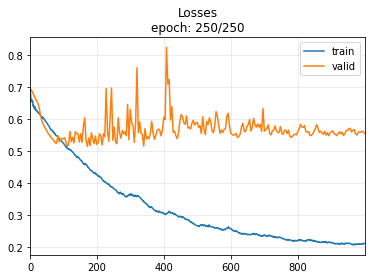

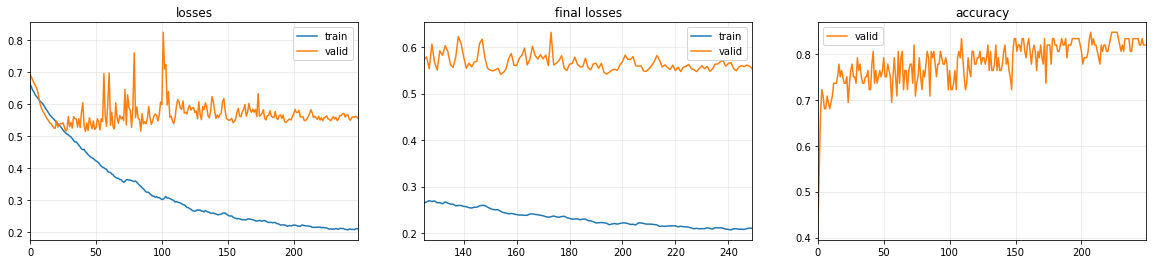

In [45]:
# MiniRocket with data augmentation
tfms = [None, TSClassification()]
batch_tfms = [TSStandardize(by_sample=True), TSMagScale(), TSWindowWarp()]
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
model = build_ts_model(MiniRocket, dls=dls)
learn = Learner(dls, model, metrics=accuracy, cbs=[ShowGraph()])
learn.fit_one_cycle(250, 3e-4)

In [46]:
PATH = Path('./models/MiniRocket_aug.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

In [47]:
del learn


In [48]:
PATH = Path('./models/MiniRocket_aug.pkl')
learn = load_learner(PATH, cpu=False)